In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import quandl
from scipy.stats import norm
quandl.ApiConfig.api_key = 'nsqaaHBqkWMWVvYEH9-9'

In [5]:
aapl_table = quandl.get('WIKI/AAPL')
googl_table = quandl.get('WIKI/GOOGL')
aapl = aapl_table.loc['2017':'2017-6',['Close']]
googl = googl_table.loc['2017':'2017-6',['Close']]
aapl_log = np.log(aapl.Close).diff().dropna()
googl_log = np.log(googl.Close).diff().dropna()

In [8]:
df = pd.concat([aapl_log, googl_log], axis = 1).dropna()
df.columns = ['aapl', 'googl']

In [9]:
df

,aapl,googl
Date,,
2017-01-04,-0.001120,-0.000297
2017-01-05,0.005072,0.006478
2017-01-06,0.011087,0.014882
2017-01-09,0.009118,0.002384
2017-01-10,0.001008,-0.001415
...,...,...
2017-06-26,-0.003628,-0.014299
2017-06-27,-0.014367,-0.024999
2017-06-28,0.014435,0.013535


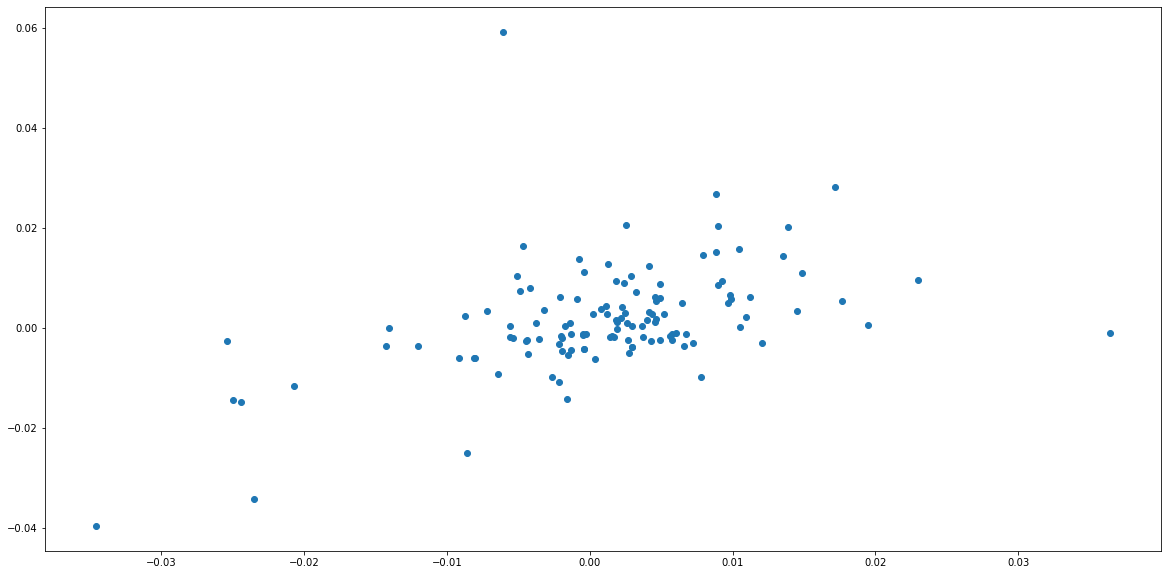

In [20]:
plt.figure(figsize = (20,10))
plt.scatter(df.googl,df.aapl)

In [21]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'aapl ~ googl', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   aapl   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     35.15
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           2.91e-08
Time:                        08:13:19   Log-Likelihood:                 402.19
No. Observations:                 124   AIC:                            -800.4
Df Residuals:                     122   BIC:                            -794.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0011      0.001      1.309      0.193      -0.001       0.003
googl          0.5368      0.091      5.929      0.000       0.358       0.716
==============================================================================
Omnibus:                       85.224   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              986.370
Skew:                           2.076   Prob(JB):                    6.49e-215
Kurtosis:                      16.178   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.params

Intercept    0.001127
googl        0.536839
dtype: float64

In [23]:
model.resid.tail()

Date
2017-06-26    0.002921
2017-06-27   -0.002074
2017-06-28    0.006042
2017-06-29   -0.002867
2017-06-30    0.005916
dtype: float64

In [24]:
model.predict()

array([ 9.67693792e-04,  4.60500280e-03,  9.11651692e-03,  2.40722633e-03,
        3.67305952e-04,  3.62354619e-03,  9.13652127e-04,  2.03889479e-03,
       -1.12584640e-03,  2.13831627e-03, -1.89245273e-03,  3.59609072e-03,
        1.15651516e-02,  4.35970315e-03,  6.73455684e-03,  2.07107261e-04,
       -6.41136687e-03, -1.25128032e-02, -1.25004677e-03, -2.12256904e-03,
        3.11218219e-03,  2.35263174e-03,  2.10160945e-03,  6.07659381e-03,
        1.54781457e-03,  1.24359990e-03,  4.21618927e-03,  3.76356980e-03,
        1.81141517e-03, -6.07510836e-04,  4.22773035e-03,  3.91195805e-03,
        2.84929430e-03,  2.44667746e-03,  9.00120689e-04, -8.88967208e-04,
        2.30364781e-03, -1.87604320e-03,  8.58514650e-03, -3.21386942e-03,
        6.40553165e-04, -1.84393029e-05,  3.57997008e-03,  2.69537850e-03,
        3.76200284e-03,  3.35353929e-03,  3.10223815e-03,  1.95236835e-03,
        2.66250379e-03,  2.12155430e-03,  2.58760867e-03, -1.62446318e-03,
       -9.97841130e-03,  

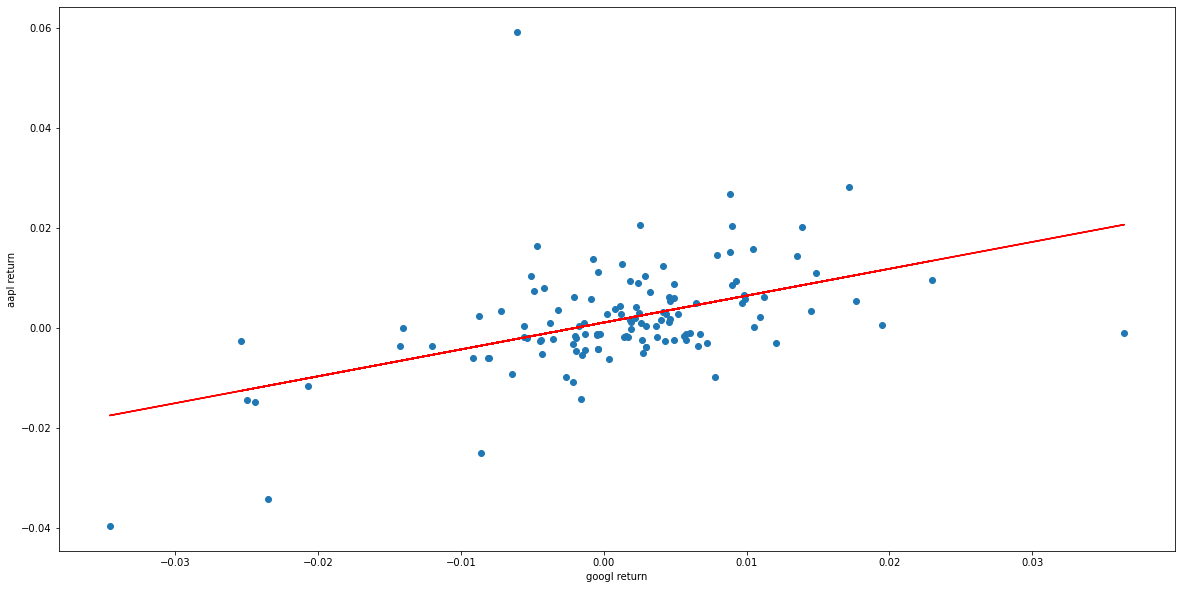

In [25]:
plt.figure(figsize = (20,10))
plt.scatter(df.googl, df.aapl)
plt.xlabel('googl return')
plt.ylabel('aapl return')
plt.plot(df.googl, model.predict(), color ='red')
plt.show()